# Data Prep


## Create data dictionary


In [9]:
# Enabling magic commands to autoreload imported packages 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Let's load all 8 csv files each as a `pandas.DataFrame` in a single dict named `data` where each key is the name of the csv file, and each value is the dataframe created from the csv 

```python
data = { 
    'sellers': DataFrame1,
    'orders': DataFrame2,
    ...
    }
```

### Create relative `csv_path` and list `file_names` to contain all csv file names in data directory

In [15]:
import os
import pandas as pd

In [13]:
# Get file names in data folder and remove unnecessary ones

csv_path = '../../olist-analysis/data/csv'

file_names = os.listdir(path=csv_path)

file_names.remove('.DS_Store')
file_names.remove('.gitkeep')
file_names.remove('product_category_name_translation.csv')

file_names

['olist_sellers_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_order_items_dataset.csv',
 'seller_dataset_modified.csv',
 'olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv']

### Create list of dict key `key_names`


Remove suffixes '.csv' or '\_dataset.csv' and prefix 'olist_'

In [18]:
key_names=[]
for file in file_names:
    file = file.replace('olist_', '')
    file = file.replace('_dataset', '')
    file = file.replace('.csv', '')
    key_names.append(file)
key_names

['sellers',
 'orders',
 'order_items',
 'seller_modified',
 'customers',
 'geolocation',
 'order_payments',
 'order_reviews',
 'products']

### Construct dictionary of data 

In [20]:
data = {}
for k,f in zip(key_names, file_names):
    data[k] = pd.read_csv(csv_path + '/' + f)
data.keys()

dict_keys(['sellers', 'orders', 'order_items', 'seller_modified', 'customers', 'geolocation', 'order_payments', 'order_reviews', 'products'])

### Implement the method `get_data()` in `olist/data.py`


In [21]:
from olist.data import Olist
Olist().get_data()

{'sellers':                              seller_id  seller_zip_code_prefix  \
 0     3442f8959a84dea7ee197c632cb2df15                   13023   
 1     d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
 2     ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
 3     c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
 4     51a04a8a6bdcb23deccc82b0b80742cf                   12914   
 ...                                ...                     ...   
 3090  98dddbc4601dd4443ca174359b237166                   87111   
 3091  f8201cab383e484733266d1906e2fdfa                   88137   
 3092  74871d19219c7d518d0090283e03c137                    4650   
 3093  e603cf3fec55f8697c9059638d6c8eb5                   96080   
 3094  9e25199f6ef7e7c347120ff175652c3b                   12051   
 
             seller_city seller_state  
 0              campinas           SP  
 1            mogi guacu           SP  
 2        rio de janeiro           RJ  
 3             sao paul

In [23]:
# Testing if method works
Olist().get_data()['sellers'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


## Create a matching table to join important foreign keys together

Entity Relationship Diagram (ERD) of Olist databases

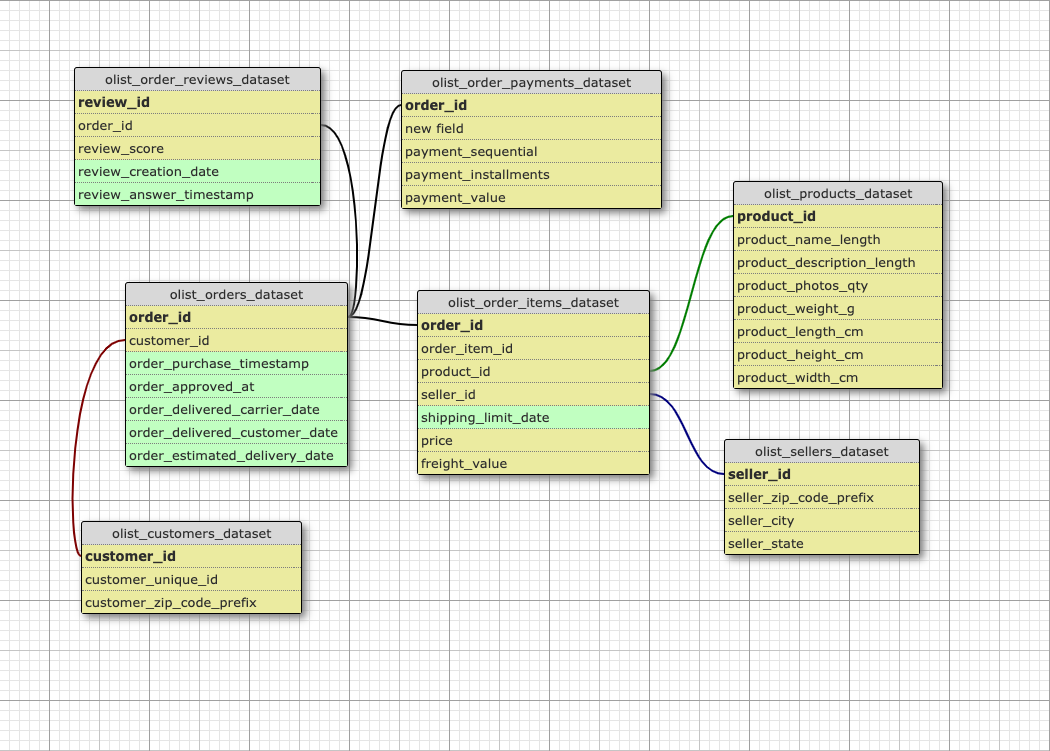

In [24]:
columns_matching_table = [
    'order_id',
    'review_id',
    'customer_id',
    'product_id',
    'seller_id']

In [25]:
# Selecting columns that will serve as keys in each dataframe
orders = data['orders'][['customer_id', 'order_id']]
reviews = data['order_reviews'][['order_id', 'review_id']]
items = data['order_items'][['order_id', 'product_id', 'seller_id']]

In [30]:
# Inspecting the cardinality of each DataFrame
print('orders:', orders.shape, orders.customer_id.nunique(), 'unique customer_ids, and', orders.order_id.nunique(), 'unique order_ids')
print('review: ', reviews.shape, reviews.order_id.nunique(), 'unique order_ids and', reviews.review_id.nunique(), 'unique reviews' )
print('items: ', items.shape, items.order_id.nunique(), 'unique order_ids,', items.product_id.nunique(), 
      'unique product_ids, and', items.seller_id.nunique(), 'unique seller_ids')

orders: (99441, 2) 99441 unique customer_ids, and 99441 unique order_ids
review:  (100000, 2) 99441 unique order_ids and 99173 unique reviews
items:  (112650, 3) 98666 unique order_ids, 32951 unique product_ids, and 3095 unique seller_ids


In [31]:
matching_table = orders.merge(reviews, on='order_id', how='outer').merge(items, on='order_id', how='outer')

matching_table.head()

,customer_id,order_id,review_id,product_id,seller_id
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,a54f0611adc9ed256b57ede6b6eb5114,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9
1,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,8d5266042046a06655c8db133d120ba5,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962
2,41ce2a54c0b03bf3443c3d931a367089,47770eb9100c2d0c44946d9cf07ec65d,e73b67b67587f7644d5bd1a52deb1b01,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2
3,f88197465ea7920adcdbec7375364d82,949d5b44dbf5de918fe9c16f97b45f8a,359d03e676b3c069f62cadba8dd3f6e8,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106
4,8ab97904e6daea8866dbdbc4fb7aad2c,ad21c59c0840e6cb83a9ceb5573f8159,e50934924e227544ba8246aeb3770dd4,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8


Inspecting the cardinality and `nunique` of the final DataFrame.


In [32]:
print(matching_table.shape)
print('unique values: ')

print(matching_table.nunique())

(114100, 5)
unique values: 
customer_id    99441
order_id       99441
review_id      99173
product_id     32951
seller_id       3095
dtype: int64
